# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


In [4]:
# Testing API key
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Create endpoint URL with each city
city_url = url + "&q=" + city

city_weather = requests.get(city_url).json()
city_weather

{'cod': '404', 'message': 'city not found'}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | aflu
City not found. Skipping...
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | najran
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | broken hill
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | kahului
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | muhos
Processing Record 21 of Set 1 | dingle
Processing Record 22 of

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,-37.04,93,16,1.71,RU,1673722065
1,hobart,-42.8794,147.3294,19.59,81,7,2.57,AU,1673722043
2,atuona,-9.8000,-139.0333,25.33,77,32,4.67,PF,1673722065
3,punta arenas,-53.1500,-70.9167,11.06,58,75,9.77,CL,1673722066
4,new norfolk,-42.7826,147.0587,19.40,63,72,0.89,AU,1673722066


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-37.04,93,16,1.71,RU,1673722065
1,hobart,-42.8794,147.3294,19.59,81,7,2.57,AU,1673722043
2,atuona,-9.8000,-139.0333,25.33,77,32,4.67,PF,1673722065
3,punta arenas,-53.1500,-70.9167,11.06,58,75,9.77,CL,1673722066
4,new norfolk,-42.7826,147.0587,19.40,63,72,0.89,AU,1673722066


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

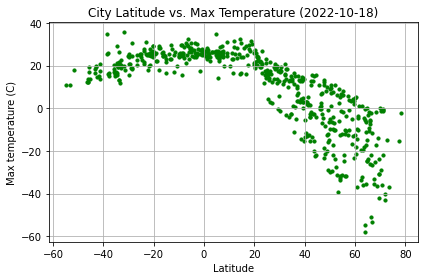

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp', s = 10, c = 'green', marker = 'o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png",transparent = False, facecolor= "white")

# Show plot
plt.show()

#### Latitude Vs. Humidity

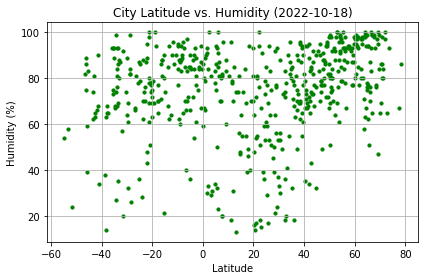

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity', s = 10, c = 'green', marker = 'o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png",transparent = False, facecolor= "white")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

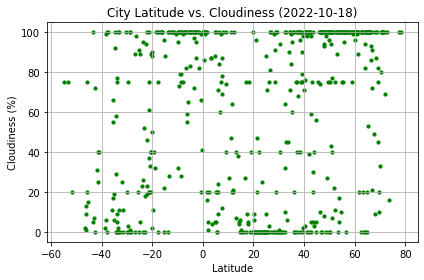

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness', s = 10, c = 'green', marker = 'o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png",transparent = False, facecolor= "white")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

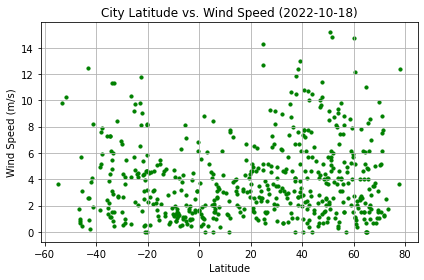

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed', s = 10, c = 'green', marker = 'o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png",transparent = False, facecolor= "white")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
import numpy as np
# Define a function to create Linear Regression plots
def my_function(x,y, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values, c = 'r')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.text(1,10,line_eq, c = 'r') #text on chart
    plt.tight_layout()
    plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-37.04,93,16,1.71,RU,1673722065
5,kapaa,22.0752,-159.3190,19.50,76,0,4.63,US,1673722067
7,najran,17.4924,44.1277,20.36,39,9,1.71,SA,1673722067
9,longyearbyen,78.2186,15.6401,-2.09,86,100,12.35,SJ,1673721897
12,kodiak,57.7900,-152.4072,3.73,93,100,2.57,US,1673722069


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hobart,-42.8794,147.3294,19.59,81,7,2.57,AU,1673722043
2,atuona,-9.8000,-139.0333,25.33,77,32,4.67,PF,1673722065
3,punta arenas,-53.1500,-70.9167,11.06,58,75,9.77,CL,1673722066
4,new norfolk,-42.7826,147.0587,19.40,63,72,0.89,AU,1673722066
6,hermanus,-34.4187,19.2345,21.00,74,58,6.15,ZA,1673722067


###  Temperature vs. Latitude Linear Regression Plot

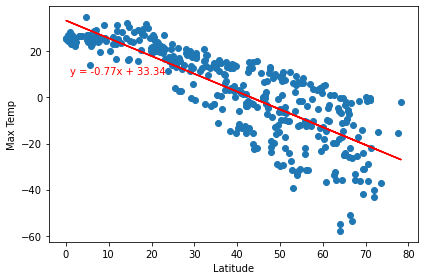

The r value is: 0.6590508555707782


In [60]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

my_function(x_values, y_values, 'Max Temp')

# Finding R value
corr = np.corrcoef(x_values, y_values)
r = corr[0,1]
r_sq = r**2
print(f'The r value is: {r_sq}')

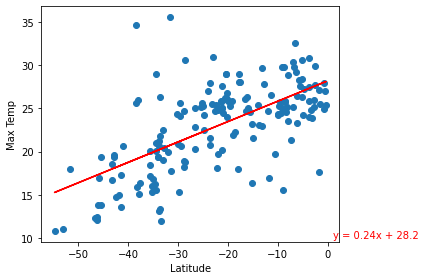

The r value is: 0.401891054210977


In [61]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

my_function(x_values, y_values, 'Max Temp')

# Finding R value
corr = np.corrcoef(x_values, y_values)
r = corr[0,1]
r_sq = r**2
print(f'The r value is: {r_sq}')

**Discussion about the linear relationship:** The plots for the northern and southern hemisphere for Temperature v. Latitude are shown above. There is a strong negative coorelation in the northern hemishere plot compared to the strong postitive correlection in the southern hemisphere plot. 

### Humidity vs. Latitude Linear Regression Plot

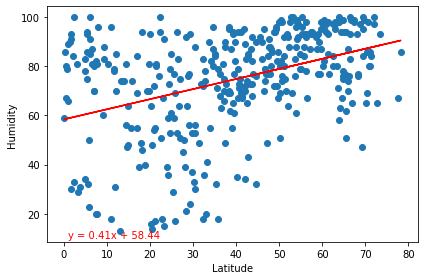

The r value is: 0.15740739109594556


In [62]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

my_function(x_values, y_values, 'Humidity')

# Finding R value
corr = np.corrcoef(x_values, y_values)
r = corr[0,1]
r_sq = r**2
print(f'The r value is: {r_sq}')

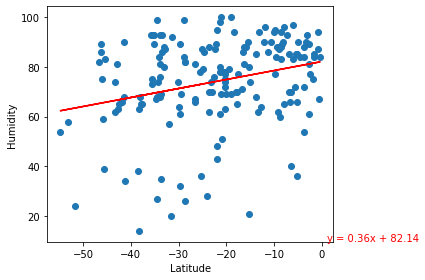

The r value is: 0.07307173505420533


In [63]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

my_function(x_values, y_values, 'Humidity')

# Finding R value
corr = np.corrcoef(x_values, y_values)
r = corr[0,1]
r_sq = r**2
print(f'The r value is: {r_sq}')

**Discussion about the linear relationship:** The plots for the northern and southern hemisphere for Humidity v. Latitude are shown above. There is a weak to no correletion for both northern and southern plots. It could be argued that there is a slight positive correlation but nothing definitive.

### Cloudiness vs. Latitude Linear Regression Plot

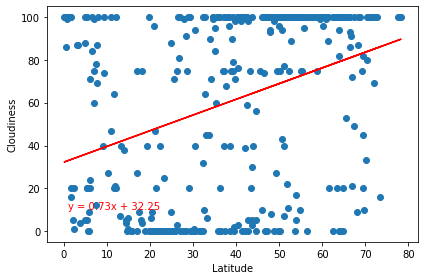

The r value is: 0.12446625210861736


In [64]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

my_function(x_values, y_values, 'Cloudiness')

# Finding R value
corr = np.corrcoef(x_values, y_values)
r = corr[0,1]
r_sq = r**2
print(f'The r value is: {r_sq}')

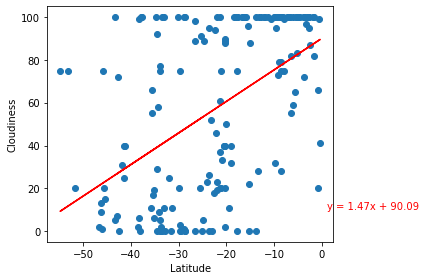

The r value is: 0.24841113144696508


In [65]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

my_function(x_values, y_values, 'Cloudiness')

# Finding R value
corr = np.corrcoef(x_values, y_values)
r = corr[0,1]
r_sq = r**2
print(f'The r value is: {r_sq}')

**Discussion about the linear relationship:** The plots for the northern and southern hemisphere for Cloudiness v. Latitude are shown above. There is a strong positive coorelation in both the northern hemishere and southern hemisphere plots.

### Wind Speed vs. Latitude Linear Regression Plot

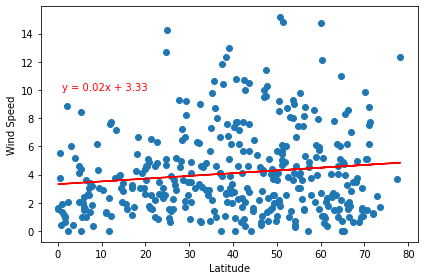

The r value is: 0.016705811817111


In [66]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

my_function(x_values, y_values, 'Wind Speed')

# Finding R value
corr = np.corrcoef(x_values, y_values)
r = corr[0,1]
r_sq = r**2
print(f'The r value is: {r_sq}')

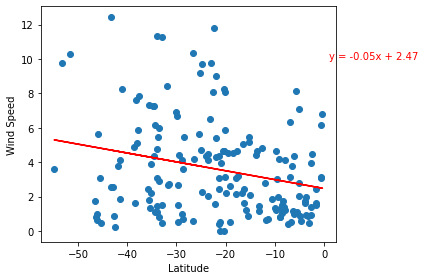

The r value is: 0.06245856646589218


In [67]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

my_function(x_values, y_values, 'Wind Speed')

# Finding R value
corr = np.corrcoef(x_values, y_values)
r = corr[0,1]
r_sq = r**2
print(f'The r value is: {r_sq}')

**Discussion about the linear relationship:** The plots for the northern and southern hemisphere for Wind Speed v. Latitude are shown above. There is a no correlation with the relationship between wind speed and latitude. 